In [4]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

In [15]:
zf = zipfile.ZipFile('../data/raw_data/iris.zip') 
iris = pd.read_csv(zf.open(zipfile.ZipFile.namelist(zf)[0]), index_col='Id')

In [16]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
target = iris['Species']
iris_features = iris.drop(columns=['Species'], axis=1)

In [19]:
iris_train, iris_test, target_train, target_test = train_test_split(iris_features, target, test_size=0.2, random_state=228)

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

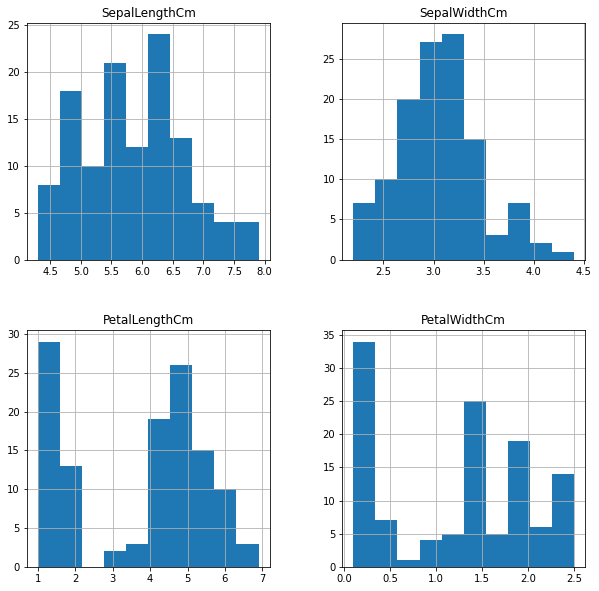

In [20]:
iris_train.hist(figsize=(10, 10))

In [21]:
max_abs_scaler = MaxAbsScaler()
iris_train_scaled = max_abs_scaler.fit_transform(iris_train)
iris_test_scaled = max_abs_scaler.transform(iris_test)

iris_train_scaled = pd.DataFrame(iris_train_scaled, columns = iris_train.columns)
iris_test_scaled = pd.DataFrame(iris_test_scaled, columns = iris_test.columns)

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

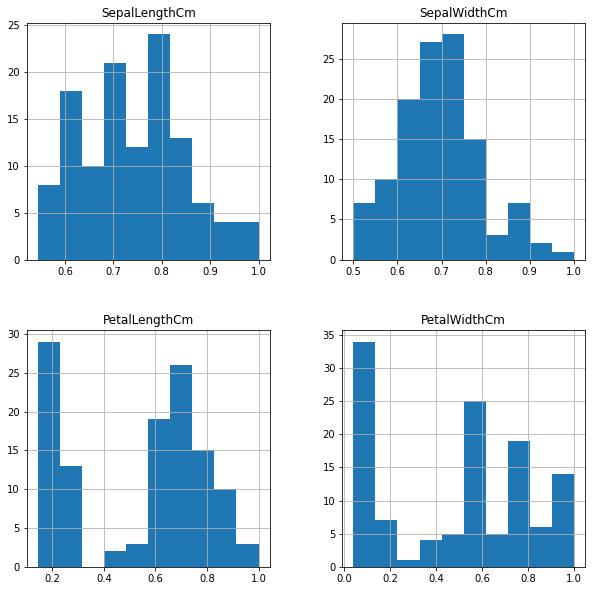

In [22]:
iris_train_scaled.hist(figsize=(10, 10))

In [24]:
iris_train_scaled['Species'] = target_train.values
iris_test_scaled['Species'] = target_test.values

In [27]:
compression_opts_train = dict(method='zip',
                        archive_name='iris_train.csv')  
iris_train_scaled.to_csv('../data/preprocessed_data/iris_train.zip', index=False, compression=compression_opts_train)

compression_opts_test = dict(method='zip',
                        archive_name='iris_test.csv')  
iris_test_scaled.to_csv('../data/preprocessed_data/iris_test.zip', index=False, compression=compression_opts_test)